<h6 style='text-align:center;font-size:40px;background-color:CRIMSON;border:20px;color:white'>BIG MART SALES DATA PREDICTION<h6>

<CENTER><IMG SRC="https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/final-grocery--cover-thumbnail-1200x1200.png"></CENTER>

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>CONTENTS<h2>

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:50px;color:white'>PROBLEM STATEMENT<h2>

The data scientists at BigMart have collected 2023 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>DATA<h2>



* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 1: Importing the Relevant Libraries <h2>

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
df_train = pd.read_csv(r"C:\Users\Pelux\Desktop\New folder (15)\Data\Big Mart\Train.csv")
df_test = pd.read_csv(r"C:\Users\Pelux\Desktop\New folder (15)\Data\Big Mart\Test.csv")

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 2. Data Inspection<h2>

In [5]:
df_train.shape,df_test.shape

((8523, 12), (5681, 11))

###### As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_test.isnull().sum()/df_test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

###### We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [9]:
df_train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df_train.isnull().sum()/df_train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

###### We have same missing values percentage of Item Size and Outlet Size columns as that of in Test set.

## Check unique values in dataset

In [11]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

## Check for categorical attributes

In [13]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [15]:
cat_col = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [16]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

## Print the categorical columns

In [17]:
for col in cat_col:
        print(col)
        print(df_train[col].value_counts())
        print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 3. Data Cleaning <h2>

### Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [18]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 1) Item_Weight

In [19]:
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(1463, 976)

<AxesSubplot: xlabel='Item_Weight'>

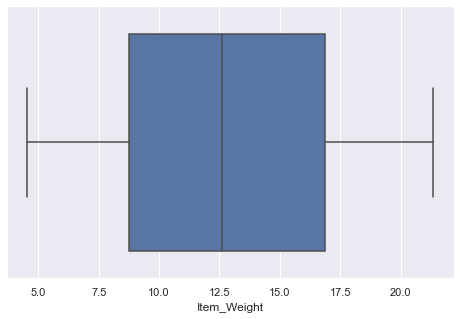

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df_train)

<AxesSubplot: xlabel='Item_Weight'>

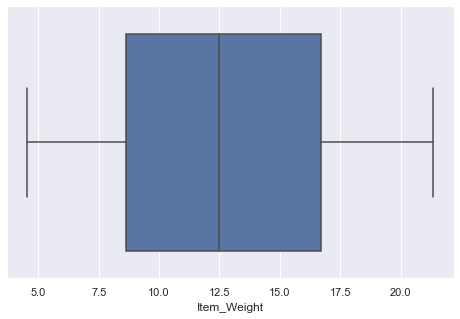

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df_test)

###### The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [22]:
df_train['Item_Weight']= df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Item_Weight']= df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [23]:
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(0, 0)

###### We have succesfully imputed the missing values from the column Item_Weight.

## 2) Outlet Size

In [24]:
df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [25]:
print(df_train['Outlet_Size'].value_counts())
print('******************************************')
print(df_test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


###### Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [26]:
df_train['Outlet_Size']= df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']= df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [27]:
df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(0, 0)

###### We have succesfully imputed the missing values from the column Outlet_Size.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4. Exploratory Data Analysis <h2>

In [5]:
import dtale

In [6]:
dtale.show(df_train)

In [8]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [9]:
from pandas_profiling import ProfileReport

2023-04-04 06:13:04,368 - INFO     - Pandas backend loaded 1.3.4
2023-04-04 06:13:04,701 - INFO     - Numpy backend loaded 1.20.3
2023-04-04 06:13:04,705 - INFO     - Pyspark backend NOT loaded
2023-04-04 06:13:04,706 - INFO     - Python backend loaded


In [10]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [11]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

###### We see there are some irregularities in some column and it is needed to fix them!

In [35]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
df_test['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df_test['Item_Fat_Content'].value_counts()

Low Fat    3677
Regular    2004
Name: Item_Fat_Content, dtype: int64

### Creation of New Attributes

In [37]:
df_train['New_Item_Type'] = df_train['Item_Identifier'].apply(lambda x: x[:2])
df_train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [38]:
df_test['New_Item_Type'] = df_train['Item_Identifier'].apply(lambda x: x[:2])
df_test['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    FD
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [39]:
df_train['New_Item_Type'] = df_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [40]:
df_test['New_Item_Type'] = df_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_test['New_Item_Type'].value_counts()

Food              4113
Non-Consumable    1030
Drinks             538
Name: New_Item_Type, dtype: int64

## Create small values for establishment year

In [41]:
df_train['Outlet_Years'] = 2023 - df_train['Outlet_Establishment_Year']
df_train['Outlet_Years']

0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: Outlet_Years, Length: 8523, dtype: int64

In [42]:
df_test['Outlet_Years'] = 2023 - df_train['Outlet_Establishment_Year']
df_test['Outlet_Years']

0       24
1       14
2       24
3       25
4       36
        ..
5676    14
5677    36
5678    16
5679    38
5680    36
Name: Outlet_Years, Length: 5681, dtype: int64

In [43]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,36


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4.A. Univariate Analysis <h2>

### 1) Item Fat Content

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

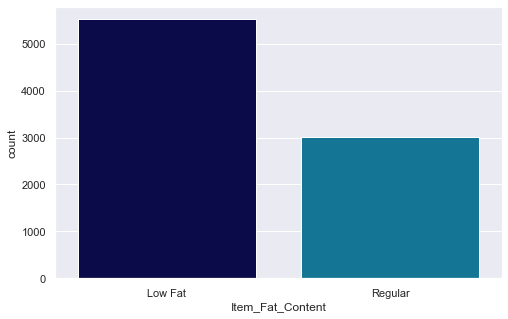

In [44]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df_train,palette='ocean')

## Observations:

* The Items bought are more of Low Fat.

### 2) Item Type

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

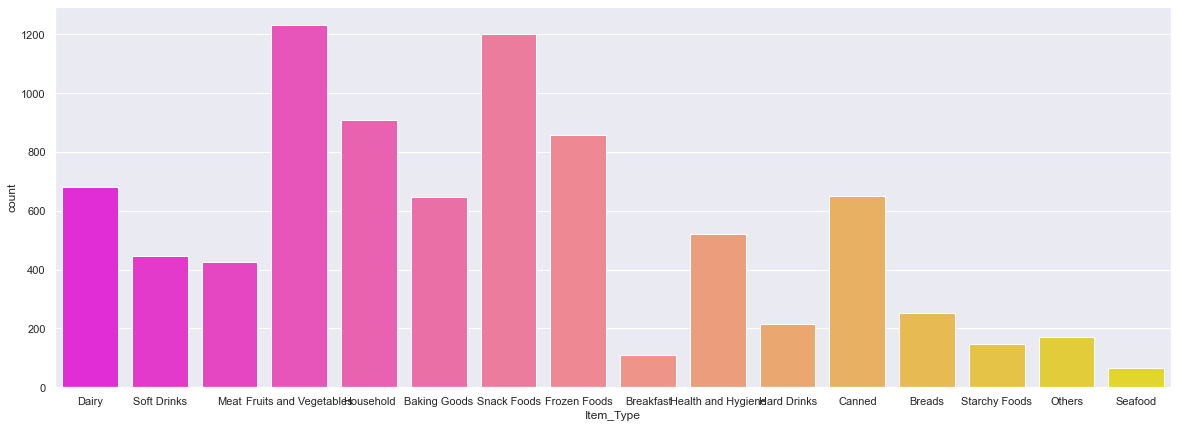

In [45]:
plt.figure(figsize=(20,7))
sns.countplot('Item_Type',data=df_train,palette='spring')

## **Observations**:
    
* Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
* Snack Foods too have good sales.

### 3) Outlet Size

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

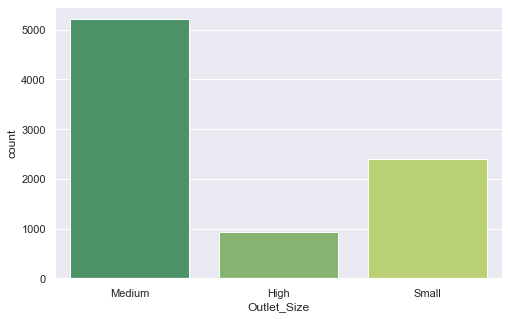

In [46]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df_train,palette='summer')

## Observations:

* The Outlets are more of Medium Size

### 4) Outlet Location Type

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

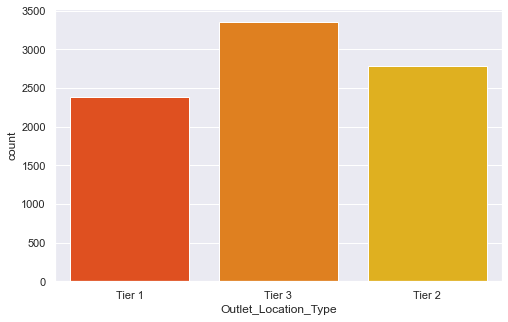

In [47]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=df_train,palette='autumn')

## **Observations**:

* The Outlets are maximum in number in Tier 3 Cities.

### 5) Outlet Type

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

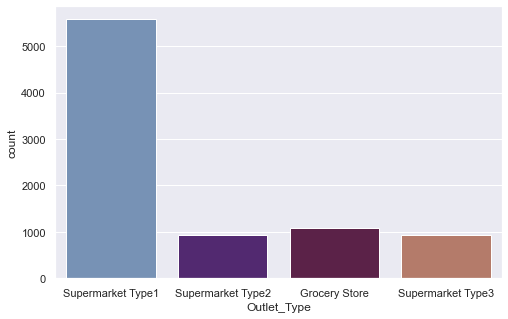

In [48]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=df_train,palette='twilight')

## Observations:
    
* The Outlets are more of Supermarket Type1.

### 6) Establishment year

<AxesSubplot: xlabel='Outlet_Years', ylabel='count'>

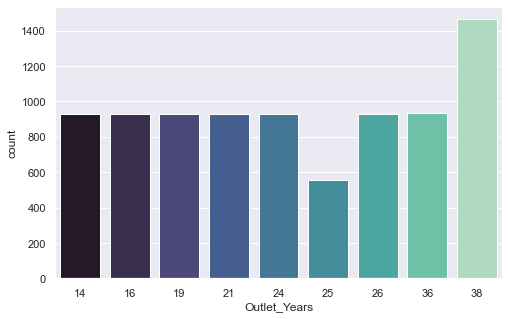

In [49]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Years',data=df_train,palette='mako')

## **Observations**:

* The Outlets are more of established and running from 38 years.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4.B Bivariate Analysis <h2>

In [50]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Years'],
      dtype='object')

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

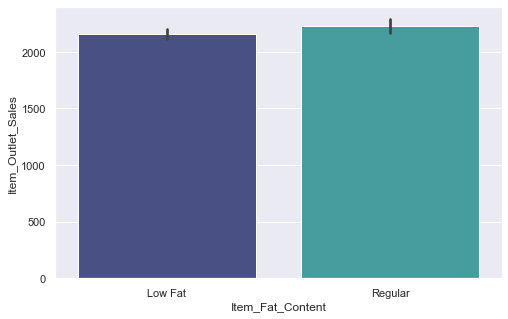

In [51]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df_train,palette='mako')

## Observations:

* The Item Outles sales are high for both Low Fat and Regular Item types.

### 2) Item Visibility

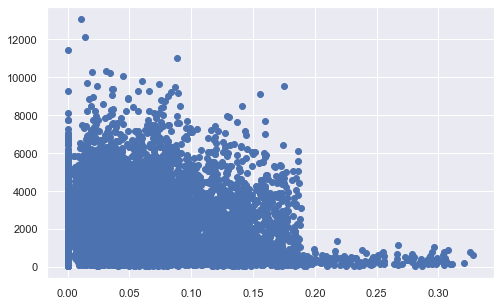

In [52]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df_train)

## Observations:

* Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

### Lets consider it like missing information and impute it with mean visibility of that product.

In [53]:
df_train['Item_Visibility']=df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())
df_test['Item_Visibility']=df_test['Item_Visibility'].replace(0,df_test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

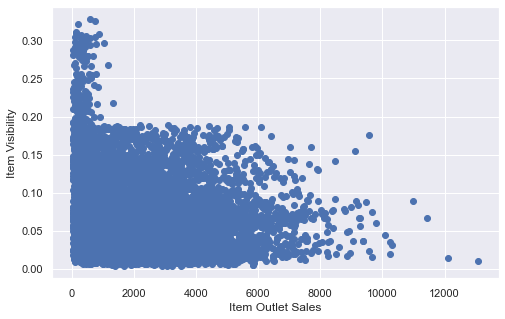

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=df_train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

###### We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

### 3) Item Type

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

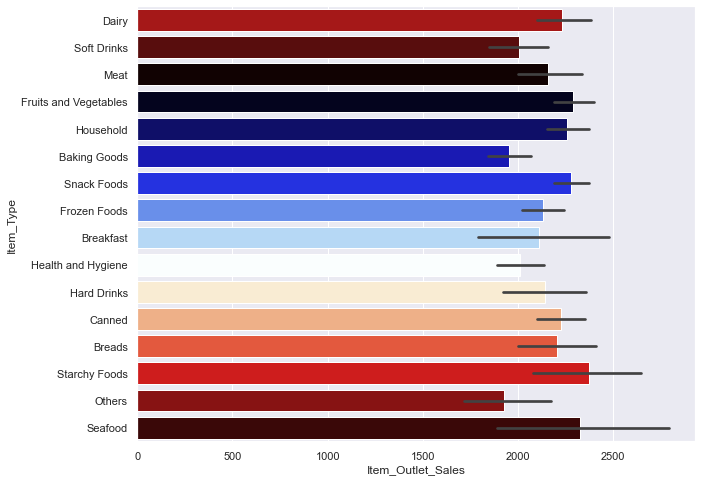

In [55]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train,palette='flag')

## Observations:

* The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

### 4) Item MRP

Text(0, 0.5, 'Item Outlet Sales')

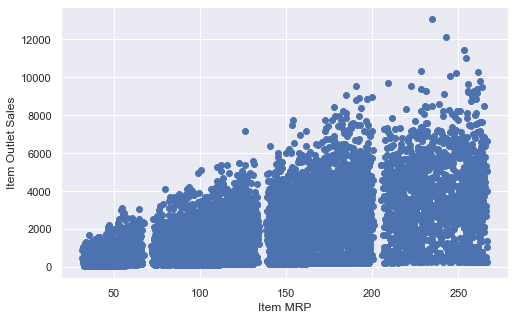

In [56]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df_train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

## **Observations**:

* Items MRP ranging from 200-250 dollars is having high Sales.

### 5) Outlet Size

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

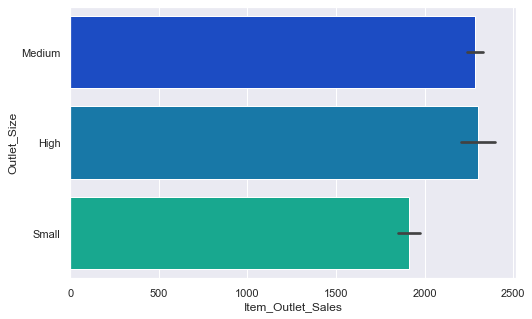

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(y='Outlet_Size',x='Item_Outlet_Sales',data=df_train,palette='winter')

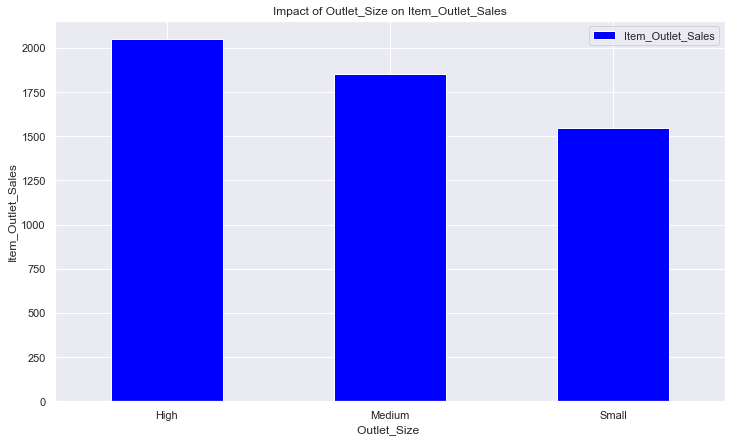

In [58]:
Outlet_Size_pivot = \
df_train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## Observations:

* The Outlet Sales is maximum for Medium and High sized Outlets.
* The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

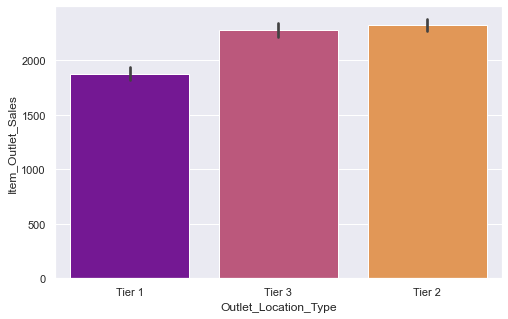

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train,palette='plasma')

## Observations:

* The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets. 

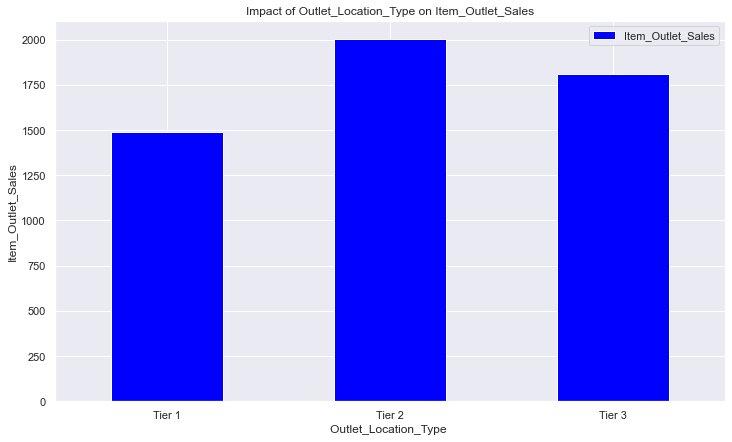

In [60]:
Outlet_Location_Type_pivot = \
df_train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<AxesSubplot: xlabel='Outlet_Years', ylabel='Item_Outlet_Sales'>

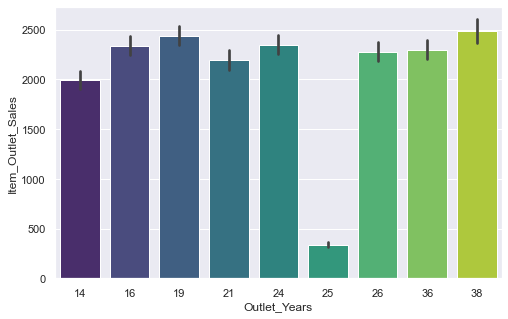

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Years',y='Item_Outlet_Sales',data=df_train,palette='viridis')

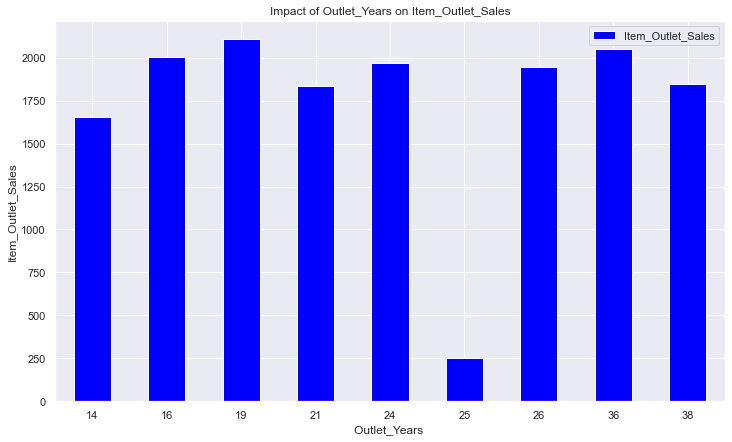

In [62]:
Outlet_Type_pivot = \
df_train.pivot_table(index='Outlet_Years', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Years ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Years on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

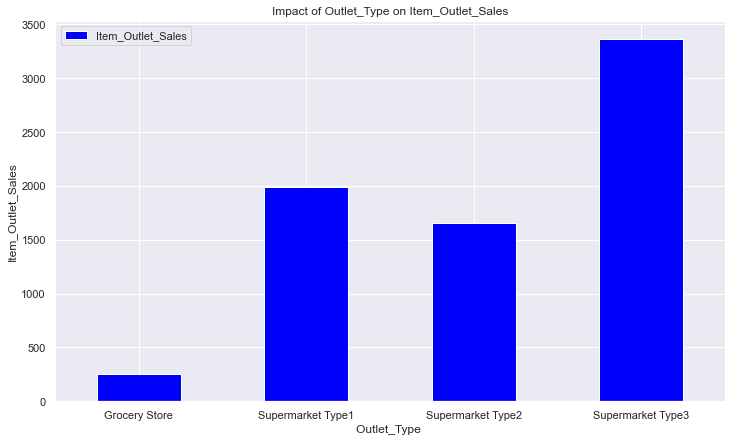

In [63]:
Outlet_Type_pivot = \
df_train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## Observations:

* It is quiet evident that Outlets established 36 years before is having good Sales margin.
* We also have a outlet which was established before 25 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4.C Multivariate Analysis<h2>

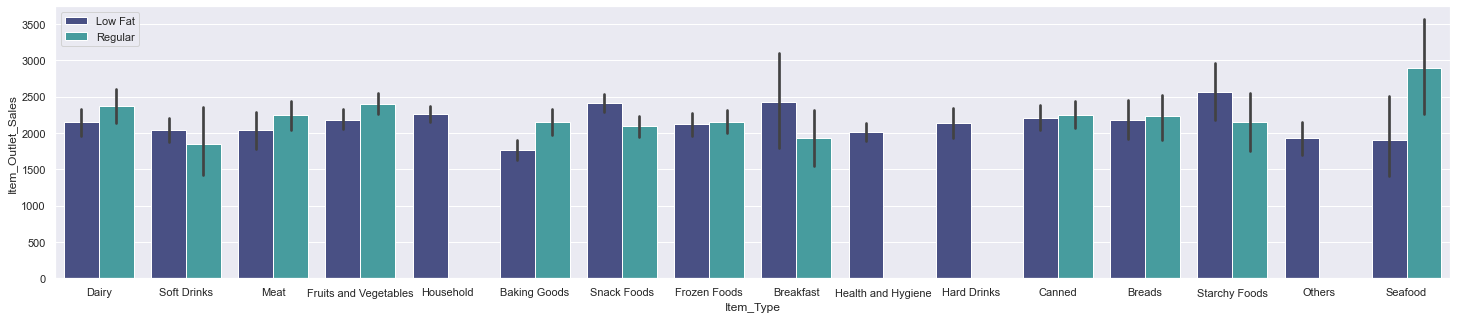

In [64]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df_train,palette='mako')
plt.legend()

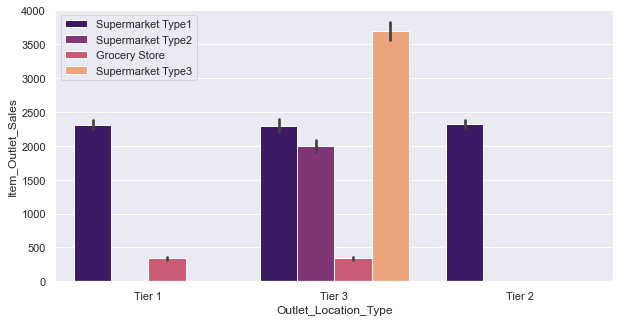

In [65]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df_train,palette='magma')
plt.legend()

## **Observations**:

* The Tier-3 location type has all types of Outlet type and has high sales margin.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 5. Feature Engineering<h2>

In [66]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,36


In [67]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

## Preprocessing Task before Model Building

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Years']= le.fit_transform(df_train['Outlet_Years'])
df_train['New_Item_Type']= le.fit_transform(df_train['New_Item_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [70]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,1,4
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,0,0
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,1,4
3,19.20,1,0.066132,6,182.0950,1998,1,2,0,732.3800,1,5
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,994.7052,2,7


In [99]:
df_train.nunique()

Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
New_Item_Type                   3
Outlet_Years                    9
dtype: int64

Executing shutdown due to inactivity...


2023-03-04 00:39:08,318 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2023-03-04 00:39:13,750 - INFO     - Executing shutdown...


## Splitting our data into train and test

In [71]:
X=df_train.drop('Item_Outlet_Sales',axis=1)

In [72]:
Y=df_train['Item_Outlet_Sales']

## Model Training

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

## Standarization

In [74]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.070213,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,1.093864,4.209316
std,4.226124,0.477836,0.048742,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,0.522090,2.730322
min,4.555000,0.000000,0.003575,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.033085,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,12.857645,0.000000,0.062517,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1.000000,4.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,1.000000,7.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,2.000000,8.000000


In [75]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [76]:
X_train_std= sc.fit_transform(X_train)

In [77]:
X_test_std= sc.transform(X_test)

In [78]:
X_train_std

array([[ 1.52290029, -0.74155088,  0.64168198, ..., -0.25964107,
        -0.1812635 ,  1.01307981],
       [-1.23985603, -0.74155088, -0.18355316, ..., -0.25964107,
        -2.08257821, -1.1829285 ],
       [ 1.54667616,  1.34852514, -0.09174167, ..., -0.25964107,
        -0.1812635 , -1.1829285 ],
       ...,
       [-0.08197107, -0.74155088, -1.05552925, ..., -0.25964107,
         1.7200512 ,  0.64707843],
       [-0.74888428,  1.34852514,  1.2014015 , ..., -0.25964107,
        -0.1812635 , -1.1829285 ],
       [ 0.67885683, -0.74155088,  1.86333265, ...,  0.98524841,
         1.7200512 , -1.54892989]])

In [79]:
X_test_std

array([[-0.43860915, -0.74155088, -0.31153777, ...,  0.98524841,
         1.7200512 , -1.54892989],
       [ 1.22570189, -0.74155088, -0.6431177 , ..., -0.25964107,
        -0.1812635 ,  1.01307981],
       [-1.21845775,  1.34852514,  0.08937986, ..., -0.25964107,
        -0.1812635 ,  0.64707843],
       ...,
       [ 0.65508096, -0.74155088,  0.84649223, ..., -1.50453056,
         1.7200512 ,  0.28107704],
       [ 1.01171904, -0.74155088, -0.08680349, ...,  0.98524841,
         1.7200512 , -1.54892989],
       [-1.56558548,  1.34852514, -1.23911865, ..., -0.25964107,
        -0.1812635 , -0.45092573]])

In [80]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [81]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 6. Building Model<h2>

## What is Cross Validation Score ?

Cros Validation score is R2 score for every fold of a n fold cross validation.

<div style="width:300px">
     
    
</div>

The (R-squared) , (also called the coefficient of determination), which is the proportion of variance (%) in the dependent variable that can be explained by the independent variable. Hence, as a rule of thumb for interpreting the strength of a relationship based on its R-squared value (use the absolute value of the R-squared value to make all values positive):
- if  R-squared value < 0.3 this value is generally considered a None or Very weak effect size,
- if R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size,
- if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size,
- if R-squared value r > 0.7 this value is generally considered strong effect size,


Ref: Source: Moore, D. S., Notz, W. I, & Flinger, M. A. (2013). The basic practice of statistics (6th ed.). New York, NY: W. H. Freeman and Company. Page (138).


In [82]:
def score(model, X=X, Y=Y):
    print("Average R2 Score :", np.average(cross_val_score(model, X, Y, cv=10)))
    print("Average Root Mean Square Error :", np.average(cross_val_score(model, X, Y, cv=10, scoring='neg_root_mean_squared_error')))

### 1) Linear regression

In [83]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [84]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [85]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
8179,11.00,0,0.055163,8,100.3358,2009,1,2,2,2,0
8355,18.00,0,0.038979,13,148.6418,1987,0,2,1,1,7
3411,7.72,1,0.074731,1,77.5986,1997,2,0,1,1,6
7089,20.70,0,0.049035,6,39.9506,2007,1,1,1,1,1
6954,7.55,0,0.027225,3,152.9340,2002,1,1,1,1,3


In [86]:
Y_pred_lr=lr.predict(X_test_std)

In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [88]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5039723119332247
880.6290653363767
1162.6935842989337


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression(positive=True)
LR.fit(X,Y)

score(LR)

Average R2 Score : 0.4840240297912433
Average Root Mean Square Error : -1224.0722529028367


### 2. Polynomial Regression

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

PR = LinearRegression(positive=True)
PR.fit(X_poly, Y)

score(PR, X_poly, Y)

Average R2 Score : 0.5351655885703994
Average Root Mean Square Error : -1161.2736265374808


### 3. Ridge Regression

In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rg = Ridge(alpha=1.84, positive=True)
rg.fit(X,Y)

score(rg)

Average R2 Score : 0.39375159392555237
Average Root Mean Square Error : -1324.1235104655857


### 4. Lasso Regression

In [92]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

ls = Lasso(alpha=1.58, positive=True)
ls.fit(X,Y)

score(ls)

Average R2 Score : 0.4840352105629207
Average Root Mean Square Error : -1224.065693301545


### 5. Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)
rfr.fit(X,Y)

score(rfr)

Average R2 Score : 0.595661689337859
Average Root Mean Square Error : -1082.8772851027331


### Random Forest Regressor (Method 2)

In [94]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=5, random_state=5)

In [95]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [100]:
Y_pred_rf= rf.predict(X_test_std)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [105]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5417696599176745
784.0386499843986
1117.5172533429088


### Hyper Parameter Tuning

In [106]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.548 using {'n_estimators': 1000}
0.513 (0.011) with: {'n_estimators': 10}
0.547 (0.003) with: {'n_estimators': 100}
0.548 (0.002) with: {'n_estimators': 1000}


In [107]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [108]:

grid_search_forest.best_score_

0.5484715312668952

In [109]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [110]:
r2_score(Y_test,Y_pred_rf_grid)

0.5416460653099378

### 6. Decision Tree Regressor

In [111]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [112]:
score(regressor)

Average R2 Score : 0.18400738677555156
Average Root Mean Square Error : -1538.9223068459908


### 7. Gradient Boosting Regressor

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

In [114]:
# with new parameters
gbr = GradientBoostingRegressor(n_estimators=100)
# with default parameters
gbr = GradientBoostingRegressor()

In [115]:
gbr.fit(X, Y)

GradientBoostingRegressor()

In [116]:
score(gbr)

Average R2 Score : 0.593842295324974
Average Root Mean Square Error : -1085.0050642527078


### Hyper Parameter Tuning

In [117]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = GradientBoostingRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.585 using {'n_estimators': 100}
0.490 (0.006) with: {'n_estimators': 10}
0.585 (0.001) with: {'n_estimators': 100}
0.504 (0.015) with: {'n_estimators': 1000}


In [118]:
grid_search_forest.best_params_

{'n_estimators': 100}

In [119]:
grid_search_forest.best_score_

0.5853027492025504

In [120]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [121]:
r2_score(Y_test,Y_pred_rf_grid)

0.5946160720493525

### Save your model

In [122]:
import joblib

In [123]:
joblib.dump(rf,r'C:\Users\Pelux\Desktop\Jupyter Notebook\Big Mart Sales\rf.sav')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Pelux\\Desktop\\Jupyter Notebook\\Big Mart Sales\\rf.sav'

In [ ]:
model=joblib.load(r'C:\Users\Pelux\Desktop\Jupyter Notebook\Big Mart Sales\rf.sav')

In [ ]:
model

In [ ]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)